# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
from IPython.core.debugger import Pdb
#Pdb().set_trace() #code for debugging, to be placed at breakpoint

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
y_all = np.concatenate((y_train,y_valid,y_test), axis=None)
n_classes =np.unique(y_all).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### [DONE] 1. Augmentation is required?
I analyze how many pictures pro traffic sing are given on the training, validation and testing data

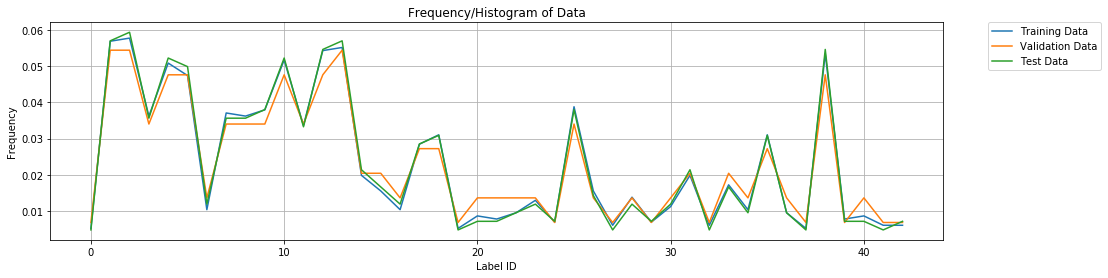

In [4]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

#getting the information to plot from train, vaidation and testing data
values, counts = np.unique(y_train, return_counts=True)
values_v, counts_v = np.unique(y_valid, return_counts=True)
values_t, counts_t = np.unique(y_test, return_counts=True)
#print(y_train)
#print([values,counts])

#other forms to plot
#plt.hist(y_train, bins = values)
#plt.bar(values,counts/len(y_train), label="Training Data")

fig = plt.figure(figsize=(16, 4))
#plotting to compare how validation, training and testing data look like pro Traffic Sign
plt.plot(values,counts/len(y_train), label="Training Data")
plt.plot(values_v,counts_v/len(y_valid), label="Validation Data")
plt.plot(values_t,counts_t/len(y_test), label="Test Data")
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Frequency/Histogram of Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

fig.savefig('../writeup_info/histograms.png')

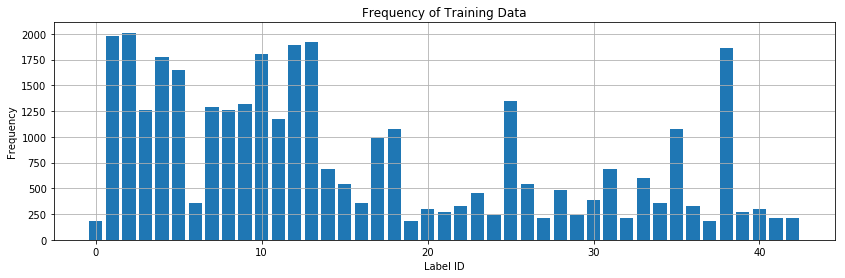

In [5]:
#plotting also training data with absolutes values
fig = plt.figure(figsize=(14, 4))
plt.bar(values,counts)
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Frequency of Training Data')
plt.grid(True)
plt.show()
fig.savefig('../writeup_info/histograms1.png')

Future Suggestions: It would be interesting to analyze the Accuracy of the NNCOnv per Label (tf.metrics.accuracy?), to see if more training data for certain class is needed. A leasy conclusion would be to said that each traffic sign should have the same amount of data, but it doens't depend only on amount but also on how valuable is the input data.  

#### [DONE] 2. See ID and Traffic Sign

In [6]:
import pandas as pd
signs = pd.read_csv('signnames.csv')
signNames = signs.values[:,1]
signs.head(44)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


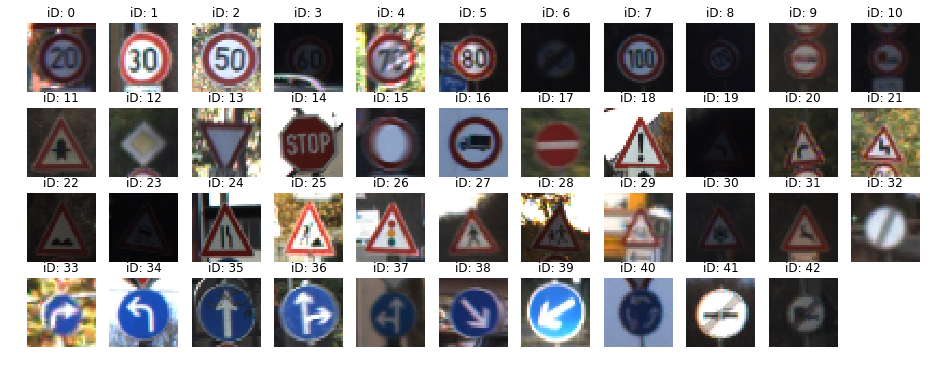

In [7]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

#sorting first occurency of each traffic sign, and getting one idx pro traffic sign
sign_idxs = []
for i in range(0, n_classes):
    idx = np.nonzero(y_test ==i)[0][0]
    sign_idxs.append(idx)

#plotting each picture with id and name in 
fig = plt.figure(figsize=(16, 6))
columns = 11
rows = 4
for i in range(0, n_classes):
    index = sign_idxs[i]
    #print(index)
    img =  X_test[index].squeeze()
    #normal picture
    fig.add_subplot(rows, columns, i+1)
    plt.title('iD: ' + str(i))
    plt.axis('off')
    plt.imshow(img)
    
fig.savefig('../writeup_info/train_signs.png')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### [DONE]:  My Preprocessing
1. Reshape: I realized that most picture can be cutted a little more uniformerly. Because background misleads NN, it is only benefitial to crop pictures if still posible.

2. RGB to Grayscale: Pictures have different ilumination. To reduce ilumination effects, pictures are change to gray scale

3. Equalization: Now at grayscale, contrast is improved using equalization. This functions uses histogram information and increase contrast of gray pictures

4. Normalization/Standarization: Now, to improve performance of the NN, pictures are normalizes. NN Input should be 0 centered.
(Here, I didn't notice a difference between normalization and standarization, which is why I only used normalization)

In [8]:
from sklearn.utils import shuffle
import cv2

### croppping figures
def reshape(img):
    #getting dimensiones, how much to cut
    (l_row, l_col,x)= img.shape
    row_crop = round(0.1*l_row)   #4
    col_crop = round(0.1*l_col)   #5
    #cutting
    img_cut = img[row_crop:-row_crop, col_crop:-col_crop, :] 
    #returning to 32x32 dimension
    img_cut = cv2.resize(img_cut, (32, 32))
    return img_cut

## from BGR to Gray
def to_grayscale(img): #output shape nxn  (array.dtype)
    output = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return output

## normalization and standarisation methods
def normalize(images):
    outputs = (images - 128) / (128)
    return outputs

def normalize1(images):
    outputs = (images - images.mean()) / (np.max(images)- np.min(images))
    return outputs

def standarise(images):
    outputs = (images - images.mean()) / (np.std(images))
    return outputs

#equalization
def histogram_equalize(img):#output shape nxn
    equ = cv2.equalizeHist(img)
    return equ
    
def preprocessing(X):
    #cut, grayscale, equalize, normalize
    X_cc = np.zeros(X.shape).astype('uint8')
    X_pp = np.zeros(X.shape[:-1]).astype('uint8')  #shape nxn
        
    for i in range(X.shape[0]):
        X_cc[i] = reshape(X[i])
        X_pp[i] = to_grayscale(X_cc[i])
        X_pp[i] = histogram_equalize(X_pp[i])
    
    X_pp= np.expand_dims(X_pp, axis=3) #shape nxnx1    
    X_pp = normalize1(X_pp)
    return X_pp

#preprocessing and save image after each step    
def preprocessing_plot(X):
    #cut, grayscale, equalize, normalize
    X_pp = np.zeros(X.shape).astype('uint8')
    X_pp1 = np.zeros(X.shape[:-1]).astype('uint8')  #shape nxn
    X_pp2 = np.zeros(X.shape[:-1]).astype('uint8')  #shape nxn
    X_pp3 = np.zeros(X.shape[:-1]).astype('uint8')  #shape nxn
    X_pp4 = np.zeros(X.shape[:-1]).astype('uint8')  #shape nxn
    
    for i in range(X.shape[0]):
        X_pp[i] = reshape(X[i])
        X_pp1[i] = to_grayscale(X_pp[i])
        X_pp2[i] = histogram_equalize(X_pp1[i])
    
    X_pp2 = np.expand_dims(X_pp2, axis=3) #shape nxnx1
    X_pp1 = np.expand_dims(X_pp1, axis=3)
    
    X_pp3 = normalize1(X_pp2)
    X_pp4 = normalize1(X_pp1)
    return X_pp1, X_pp2, X_pp3, X_pp4

#Images to plot, to see preprocessing steps
Xp1,Xp2,Xp3,Xp4 =  preprocessing_plot(X_train)

#Preprocess images to use for training. Also plotted to confirm can incongruence between preprocessing_plot and plot function
X_train_n = preprocessing(X_train)
X_valid_n =  preprocessing(X_valid)
X_test_n =  preprocessing(X_test)

print(Xp1[1].dtype)

uint8


**[Done]** Here, I plot each step from preprocessing. 

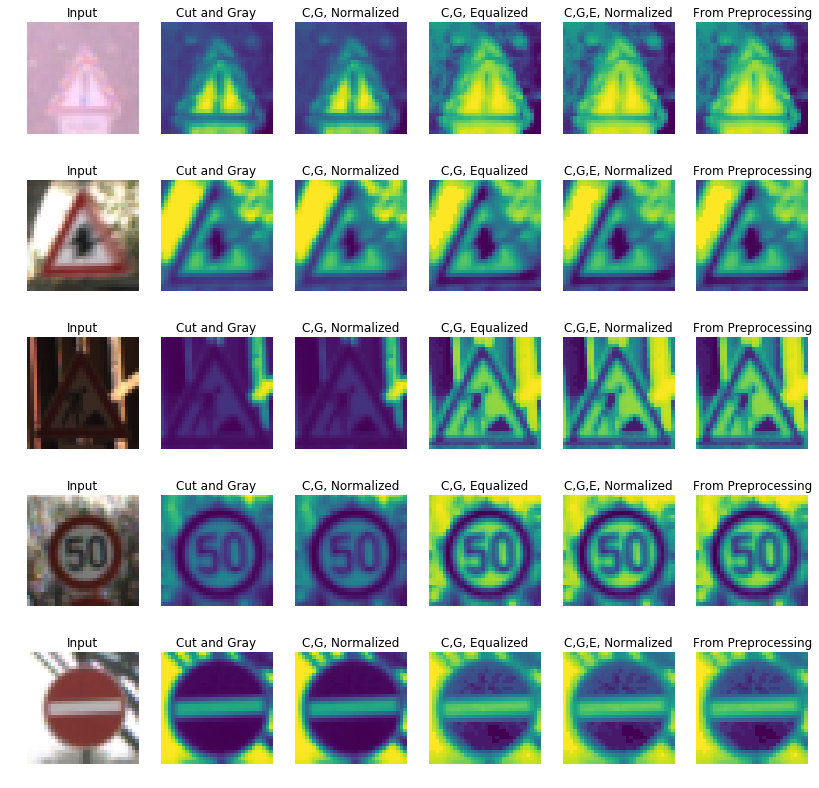

In [9]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

fig = plt.figure(figsize=(14, 14))
columns = 6
rows = 5
for i in range(1, columns*rows +1,6):
    index = random.randint(0,len(X_train))
    #print(index)
    img =  X_train[index].squeeze()
    img_mod = Xp1[index].squeeze()
    img_mod1 = Xp2[index].squeeze()
    img_mod2 = Xp3[index].squeeze()
    img_mod3 = Xp4[index].squeeze()
    img_mod4 = X_train_n[index].squeeze()
    
    #normal picture
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title('Input')
    plt.imshow(img)
    
    #cutted and converted to gray
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('Cut and Gray')
    plt.imshow(img_mod)
    
    #cutted, gray,equalized
    fig.add_subplot(rows, columns, i+3)
    plt.axis('off')
    plt.title('C,G, Equalized')
    plt.imshow(img_mod1)
    
    #cutted, gray,equalized and normalized
    fig.add_subplot(rows, columns, i+4)
    plt.axis('off')
    plt.title('C,G,E, Normalized')
    plt.imshow(img_mod2)
    
    #cutted, gray,normalized (without equalization!)
    fig.add_subplot(rows, columns, i+2)
    plt.axis('off')
    plt.title('C,G, Normalized')
    plt.imshow(img_mod3)
    
    #final preprocessing congruence
    fig.add_subplot(rows, columns, i+5)
    plt.axis('off')
    plt.title('From Preprocessing')
    plt.imshow(img_mod4)
    
fig.savefig('../writeup_info/preprocessing.png')

**Conclusions:** Normalization Effect doesnt modify the picture

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

#Epocs: how many times all training date will be used to train
EPOCHS = 150 #200# 150 75 #80
#Batch_Size: 128 pictures will be analyzed before actualizing weights
BATCH_SIZE = 128

#### **[DONE]** I made the following modifications to LeNet Structure:
1. I add three droput functions at the highest layer, to reduce the correlation between previous layers
2. I add a convolution layer after first convolution layer, in order to increase detection on the lowest layer of NN. 

Conv1: n
- 32x21x1 Input 
- 30x30x6 Output
*I change to a filter size of 3, to increase accuracy of the first layer*


Conv12:
- 30x30x6 Input 
- 28x28x10 Output
*Extra filter of size 3 is running. Also depth of the filter is increase from 6 to 10*

Polling 1:
- 28x28x10 Input 
- 14x14x10 Output
*Remains as before*

Conv2:
- 14x14x10 Input 
- 10x10x16 Output
*Jump from 10 to 16 on the filter shorter as before (6 to 16)*

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet6(x, keep_prob, keep_prob_soft):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1    = tf.nn.dropout(conv1, keep_prob_soft)

    # EXTRA: Layer 12: Convolutional. Output = 28x28x10.
    conv12_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 10), mean = mu, stddev = sigma))
    conv12_b = tf.Variable(tf.zeros(10))
    conv12   = tf.nn.conv2d(conv1, conv12_W, strides=[1, 1, 1, 1], padding='VALID') + conv12_b
    
    # Activation.
    conv12 = tf.nn.relu(conv12)
    
    # Pooling. Input = 28x28x10. Output = 14x14x10.
    conv12 = tf.nn.max_pool(conv12, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv12, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # EXTRA: Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # EXTRA: Dropout
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # EXTRA: Dropout
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes(43).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1, conv12, conv2

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

1.1 Training Pipeline

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001
keep_prob = tf.placeholder(tf.float32, []) 
keep_prob_soft = tf.placeholder(tf.float32, []) 

logits, conv1, conv12, conv2 = LeNet6(x, keep_prob, keep_prob_soft)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

1.2 Model Evaluation

In [13]:
#it get the index/position of the higgest probability and the right label and compare
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#name where NN is save
saver = tf.train.Saver()

def evaluate(X_data_n, y_data):
    num_examples = len(X_data_n)
    total_loss = 0
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data_n[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1, keep_prob_soft: 1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

1.3 Train the Model

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_n)
    
    #training and validation log
    validation_accuracy_log = []
    validation_loss_log = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_n, y_train = shuffle(X_train_n, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_n[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6, keep_prob_soft: 0.75})
            
        validation_loss, validation_accuracy = evaluate(X_valid_n, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        #save information to plot later
        validation_loss_log.append(validation_loss)
        validation_accuracy_log.append(validation_accuracy)
        
    saver.save(sess, './lenet')
    print("Model saved")
    
#save log in a pickle
dist_pickle = {}
dist_pickle["loss"] = validation_loss_log
dist_pickle["accuracy"] = validation_accuracy_log
pickle.dump( dist_pickle, open( "log_information.p", "wb" ) )

Training...

EPOCH 1 ...
Validation Accuracy = 0.648

EPOCH 2 ...
Validation Accuracy = 0.835

EPOCH 3 ...
Validation Accuracy = 0.891

EPOCH 4 ...
Validation Accuracy = 0.911

EPOCH 5 ...
Validation Accuracy = 0.937

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.962

EPOCH 8 ...
Validation Accuracy = 0.956

EPOCH 9 ...
Validation Accuracy = 0.950

EPOCH 10 ...
Validation Accuracy = 0.965

EPOCH 11 ...
Validation Accuracy = 0.974

EPOCH 12 ...
Validation Accuracy = 0.977

EPOCH 13 ...
Validation Accuracy = 0.968

EPOCH 14 ...
Validation Accuracy = 0.976

EPOCH 15 ...
Validation Accuracy = 0.975

EPOCH 16 ...
Validation Accuracy = 0.977

EPOCH 17 ...
Validation Accuracy = 0.981

EPOCH 18 ...
Validation Accuracy = 0.979

EPOCH 19 ...
Validation Accuracy = 0.981

EPOCH 20 ...
Validation Accuracy = 0.983

EPOCH 21 ...
Validation Accuracy = 0.982

EPOCH 22 ...
Validation Accuracy = 0.982

EPOCH 23 ...
Validation Accuracy = 0.982

EPOCH 24 ...
Validation Accura

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss,test_accuracy = evaluate(X_test_n, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.970


**[DONE]** Also save log information of accuracy and loss curve. Then, plot it

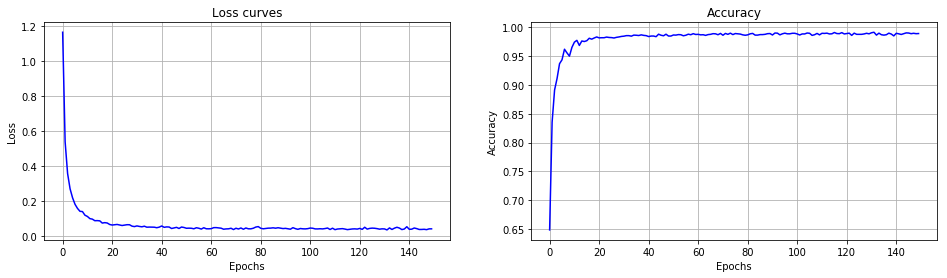

In [16]:
dist_pickle = pickle.load( open( "log_information.p", "rb" ) )
validation_loss_log = dist_pickle["loss"]
validation_accuracy_log = dist_pickle["accuracy"]

fig = plt.figure(figsize=(16, 4))
#plotting loss curve
loss_plot = plt.subplot(1,2,1)                                                      
loss_plot.set_title('Loss curves')
loss_plot.set_xlabel('Epochs')
loss_plot.set_ylabel('Loss')
loss_plot.grid(which='both') 
                                    
loss_plot.plot(validation_loss_log, 'b')

#plotting loss curve
acc_plot = plt.subplot(1,2,2)                                                      
acc_plot.set_title('Accuracy')
acc_plot.set_xlabel('Epochs')
acc_plot.set_ylabel('Accuracy')
acc_plot.grid(which='both')  
                                      
acc_plot.plot(validation_accuracy_log, 'b')
fig.savefig('../writeup_info/nn_curves.png')
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import cv2
import matplotlib.image as mpimg

#get paths from pictures
paths = sorted(glob.glob('../images/img*.jpg'))
print(paths)

X_test_own = np.zeros((len(paths),X_test.shape[1], X_test.shape[2], X_test.shape[3])).astype('uint8')

for idx, fname in enumerate(paths):
    #load pictures
    img = mpimg.imread(fname)
    img = cv2.resize(img, (32, 32))
    #modify pictures
    X_test_own[idx]=img
    
y_test_own = [11,12,12,2,18,14,12,38,36,12,38,25,1,14,17]

assert X_test_own.shape[0] == len(y_test_own), "dimensions don't match"
print(X_test_own.shape)

['../images/img1.jpg', '../images/img10.jpg', '../images/img12.jpg', '../images/img13.jpg', '../images/img14.jpg', '../images/img15.jpg', '../images/img16.jpg', '../images/img17.jpg', '../images/img2.jpg', '../images/img3.jpg', '../images/img4.jpg', '../images/img6.jpg', '../images/img7.jpg', '../images/img8.jpg', '../images/img9.jpg']
(15, 32, 32, 3)


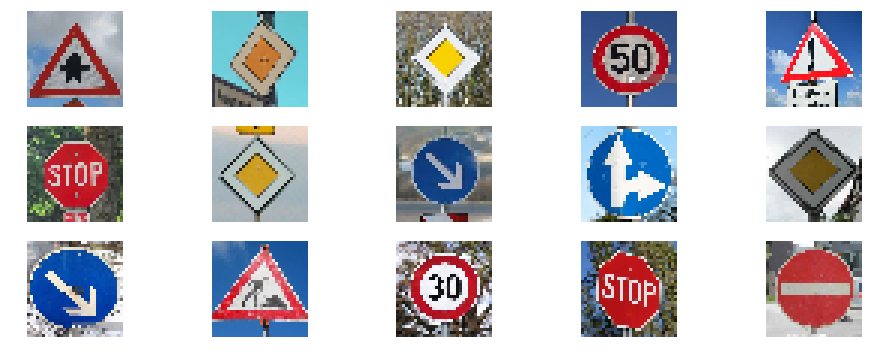

In [18]:
#plotting each picture with id and name in 
fig = plt.figure(figsize=(16, 6))
columns = 5
rows = 3
for i in range(0, columns*rows):
    #print(index)
    img =  X_test_own[i].squeeze()
    #normal picture
    fig.add_subplot(rows, columns, i+1)
    #plt.title('iD: ' + str(i))
    plt.axis('off')
    plt.imshow(img)

fig.savefig('../writeup_info/my_signs.png')

### Predict the Sign Type for Each Image

In [19]:
import tensorflow as tf
saver = tf.train.Saver()

#Preprocessing
X_test_own_n =  preprocessing(X_test_own)

In [20]:
### Run the predictions here and use the model to output the prediction for each image.

def predict(X_data_n, y_data):
    sess = tf.get_default_session()
    #get the highest value of the logits
    prediction = tf.argmax(logits, 1)
    #run
    predictions = sess.run(prediction, feed_dict={x: X_data_n, y: y_data, keep_prob: 1, keep_prob_soft: 1})
    return predictions

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred = predict(X_test_own_n, y_test_own)
    print(y_pred)

INFO:tensorflow:Restoring parameters from ./lenet
[11 12 12  2 18 14 12 38 36 12 38 25  1 14 17]


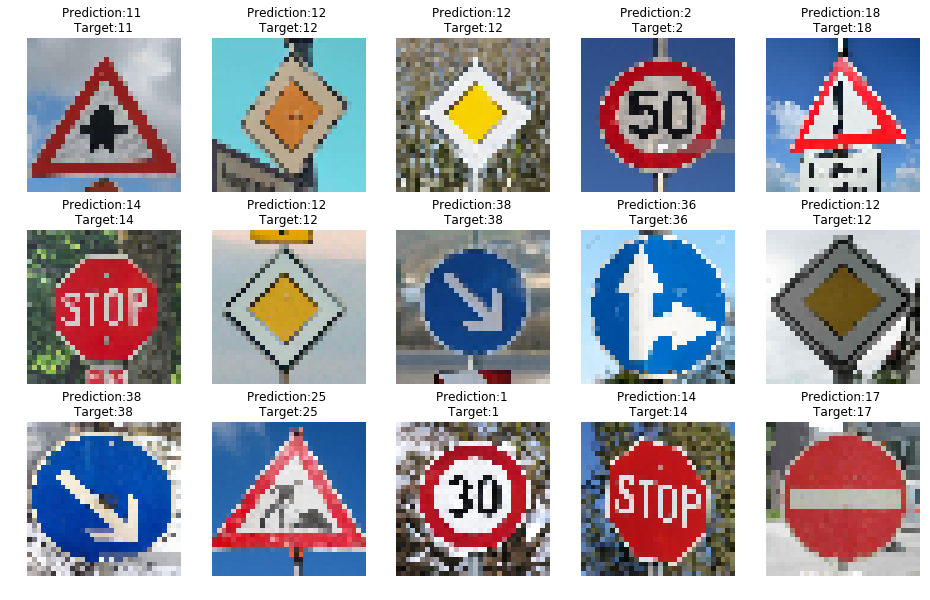

In [21]:
#plotting each picture with id and name in 
fig = plt.figure(figsize=(16, 10))
columns = 5
rows = 3
for i in range(0, columns*rows):
    #print(index)
    img =  X_test_own[i].squeeze()
    #normal picture
    fig.add_subplot(rows, columns, i+1)
    plt.title('Prediction:%s \nTarget:%s'%(y_pred[i], y_test_own[i]))
    #plt.title('iD: ' + str(i))
    plt.axis('off')
    plt.imshow(img)
    
fig.savefig('../writeup_info/my_sign_prediction.png')

### Analyze Performance

In [22]:
### Calculate the accuracy for these new images

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy = evaluate(X_test_own_n, y_test_own)
    print("Test Accuracy on my Images = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy on my Images = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#add a softmax function in prediction, so that the 10 output value pass through a softmax function
def predict_top5(X_data_n, y_data):
    sess = tf.get_default_session()
    #get the highest value of the logits
    softmax = tf.nn.softmax(logits)
    top5 = tf.nn.top_k(softmax, 5)
    #run
    predictions = sess.run(top5, feed_dict={x: X_data_n, y: y_data, keep_prob: 1, keep_prob_soft: 1})
    return predictions

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred_t5 = predict_top5(X_test_own_n, y_test_own)
    #print(y_pred_t5.indices)

INFO:tensorflow:Restoring parameters from ./lenet


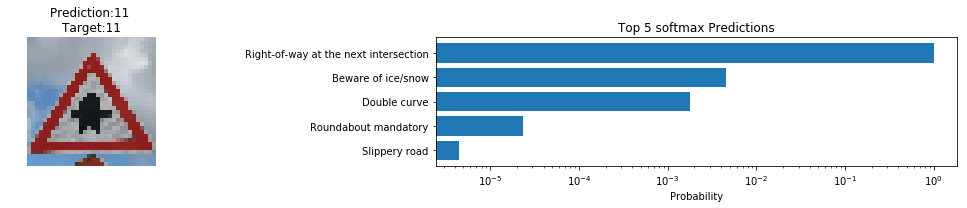

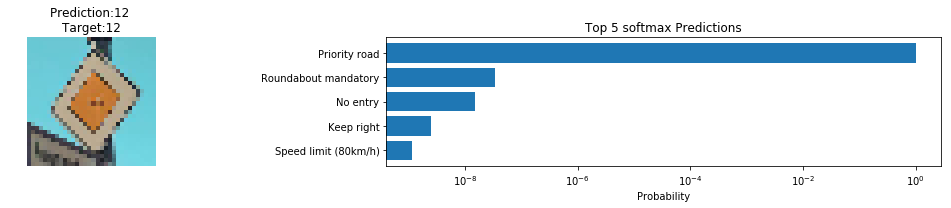

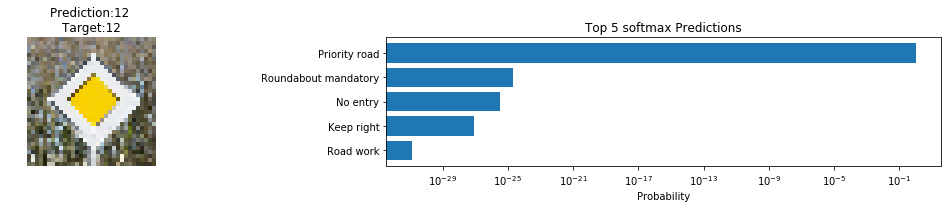

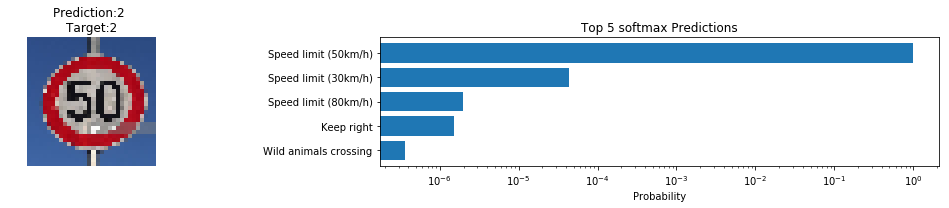

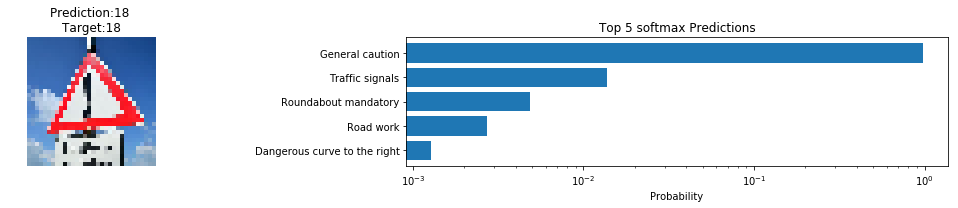

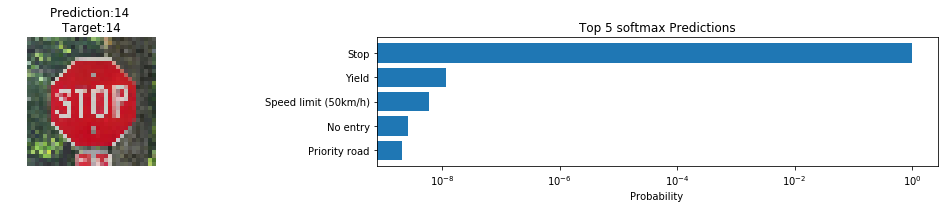

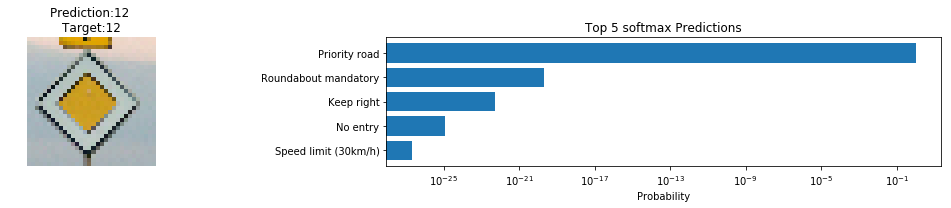

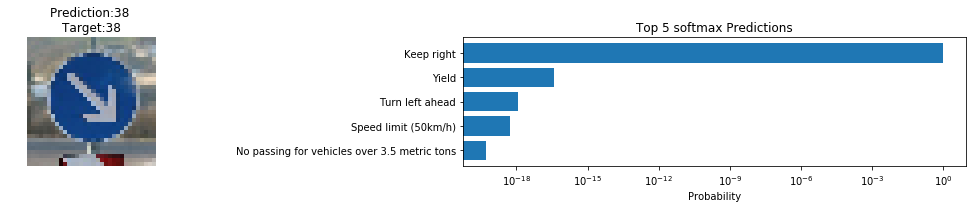

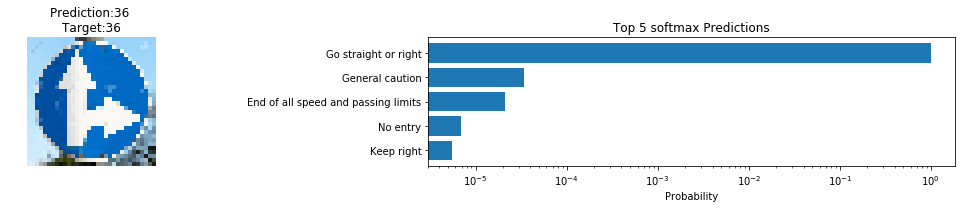

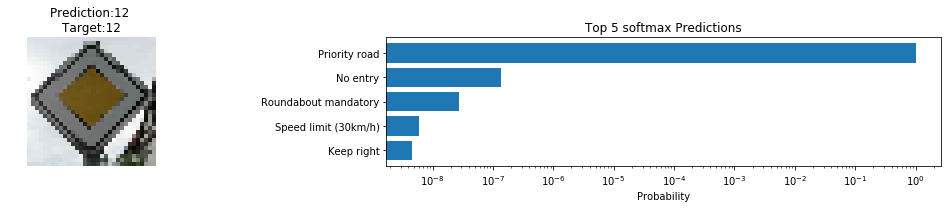

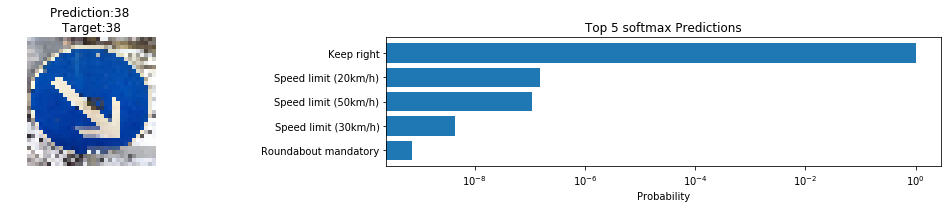

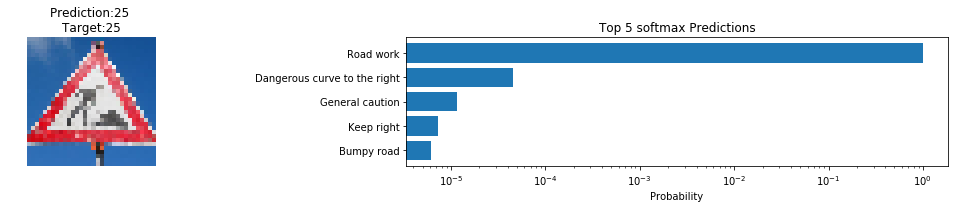

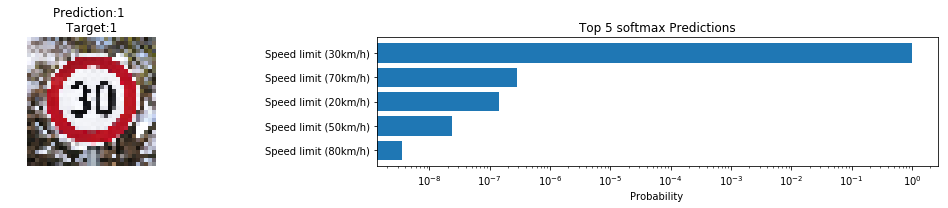

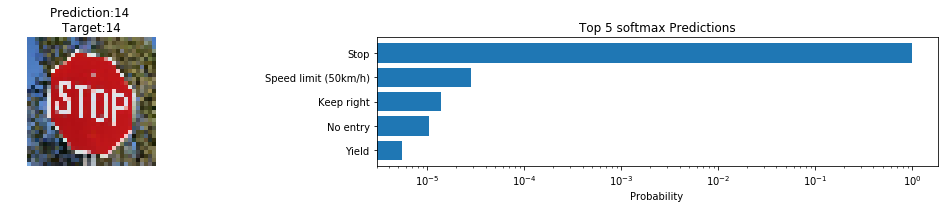

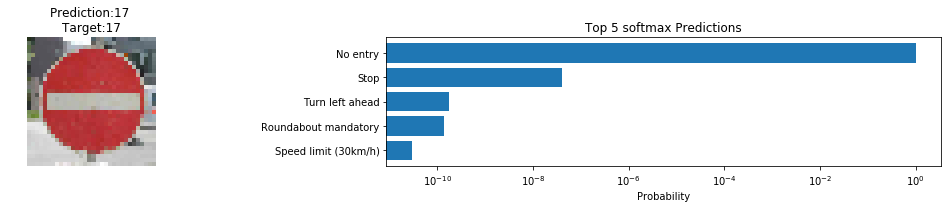

In [24]:
#creating index numbers
y_pos = np.arange(len(y_pred_t5.indices[i]))

for i in range(len(y_pred_t5.indices)):
    
    #creating a figure and getting name of each axes
    fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16, 3))
    
    #picture plotting    
    ax1.axis('off')
    ax1.imshow(X_test_own[i].squeeze())  
    #print(i)
    ax1.set_title('Prediction:%s \nTarget:%s'%(y_pred[i], y_test_own[i]))
    
    #gettin information for barh plotting
    top5_names=[]
    for j in range(5):
        name= signNames[y_pred_t5.indices[i][j]]
        top5_names.append(name)

    prob = y_pred_t5.values[i]

    #barh graph plotting
    ax2.barh(y_pos, prob, align='center', log = True)
    #ax.set_xlim([0,1])
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(top5_names)
    ax2.set_xlabel('Probability')
    ax2.invert_yaxis()
    ax2.set_title('Top 5 softmax Predictions')
    
    plt.tight_layout()
    plt.show()

    fig.savefig('../writeup_info/top5_'+str(i) +".png")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


**[DONE]** I have added a title on the output image from outputFeatureMap

In [25]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, title = "Conv Layer", activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob: 1, keep_prob_soft: 1})
    featuremaps = activation.shape[3]
    fig = plt.figure(plt_num, figsize=(15,15))
    plt.suptitle(title, y = 0.9, fontsize=16)
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    
    fig.savefig('../writeup_info/conv_output' + str(plt_num) + '.png')       
        

In [26]:
#choosing one picture and adjusting to right dimensions
img = X_test_own_n[3]
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 32, 32, 1)


INFO:tensorflow:Restoring parameters from ./lenet


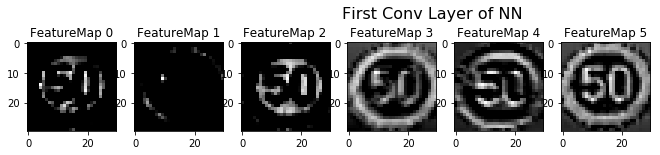

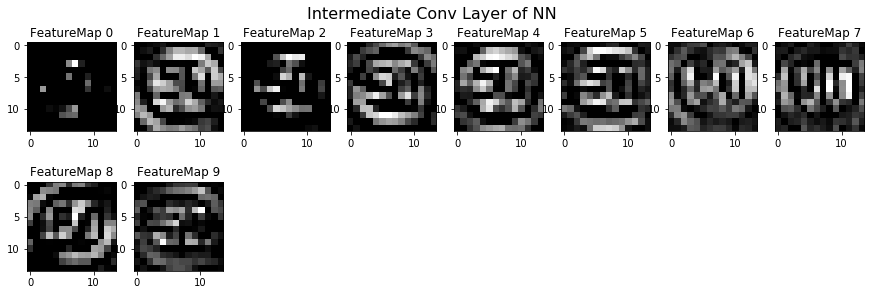

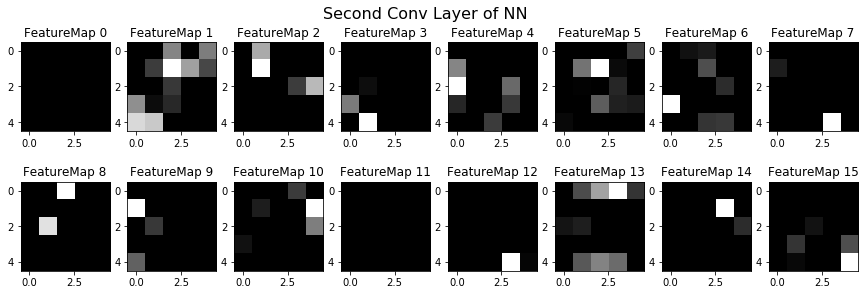

In [27]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    outputFeatureMap(img, conv1,title ="First Conv Layer of NN" , plt_num=1)  
    outputFeatureMap(img, conv12,title ="Intermediate Conv Layer of NN", plt_num=2)
    outputFeatureMap(img, conv2,title ="Second Conv Layer of NN", plt_num=3)
